In [42]:
import pandas as pd
import requests
from pandas import DataFrame, Series
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns 


In [2]:
cars = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
cars_df = pd.DataFrame(cars)

In [31]:
cars_df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
cluster_labels     int32
dtype: object

In [5]:
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [12]:
cars_df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
cars_df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
len(cars_df)

4340

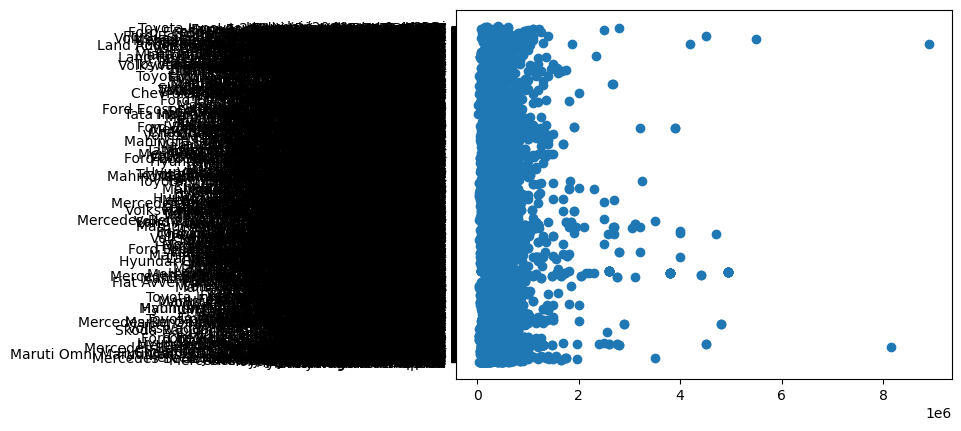

In [32]:
name_var = cars_df['name']
price_var = cars_df['selling_price']
year_var = cars_df['year']
transmission_var = cars_df['transmission']
seller_type_var = cars_df['seller_type']
fuel_var = cars_df['fuel']
km_driven_var = cars_df['km_driven']
owner_var = cars_df['owner']
plt.scatter(price_var, name_var)

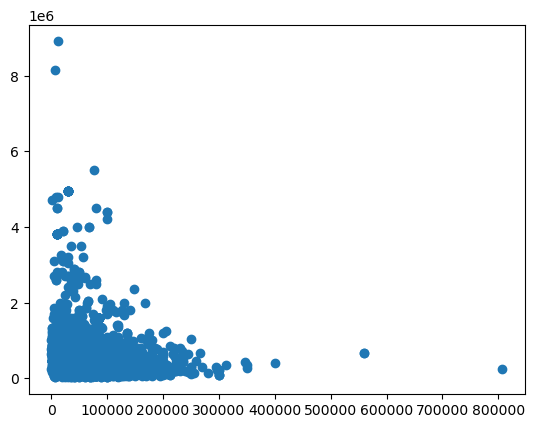

In [33]:

plt.scatter(km_driven_var, price_var)

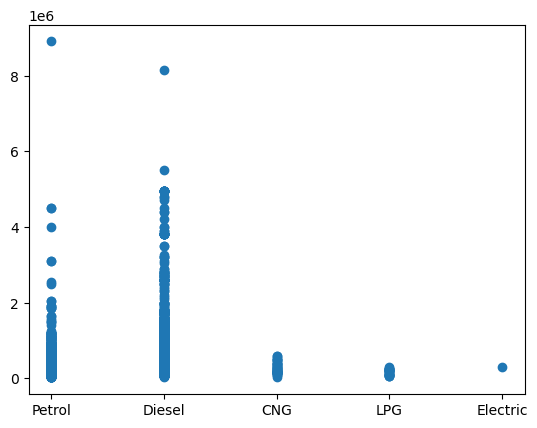

In [36]:

plt.scatter(fuel_var, price_var)

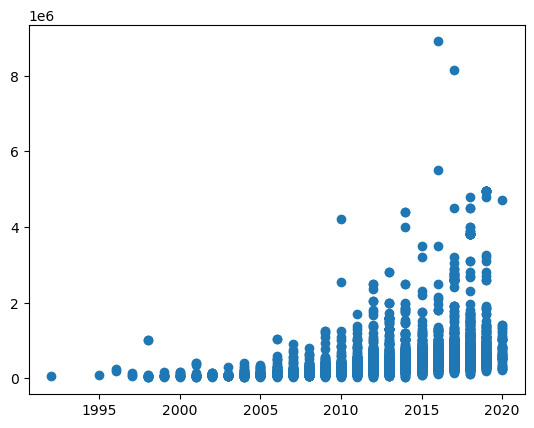

In [35]:

plt.scatter(year_var, price_var)

In [39]:
#Divide the year selling price grouping into clusters, 
year_price_df = cars_df[['year', 'selling_price']]
display(year_price_df)
kmeans = KMeans(n_clusters = 3).fit(year_price_df)


,year,selling_price
0,2007,60000
1,2007,135000
2,2012,600000
3,2017,250000
4,2014,450000
...,...,...
4335,2014,409999
4336,2014,409999
4337,2009,110000
4338,2016,865000


c:\Users\scott\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [40]:
#Cluster labels find which cluster each of the year selling_price combinations fall under
year_price_df['cluster'] = kmeans.labels_
year_price_df

C:\Users\scott\AppData\Local\Temp\ipykernel_39060\3833061136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_price_df['cluster'] = kmeans.labels_


,year,selling_price,cluster
0,2007,60000,0
1,2007,135000,0
2,2012,600000,2
3,2017,250000,0
4,2014,450000,0
...,...,...,...
4335,2014,409999,0
4336,2014,409999,0
4337,2009,110000,0
4338,2016,865000,2


In [41]:
#learn the cluster centers
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['year', 'selling_price'])
centers

,year,selling_price
0,2011.961356,2.845000e+05
1,2017.032609,3.527859e+06
2,2016.026581,8.846773e+05


<Axes: xlabel='year', ylabel='selling_price'>

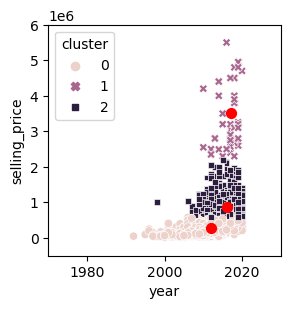

In [54]:
year_price_df
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.scatterplot(x='year', y='selling_price', hue='cluster', style='cluster', ax=ax, data=year_price_df)
ax.set_xlim(1970, 2030)
ax.set_ylim(-500000, 6000000)
centers.plot.scatter(x='year', y='selling_price', ax=ax, s=50, color='red')

c:\Users\scott\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\scott\AppData\Local\Temp\ipykernel_39060\437359662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_price_df['cluster'] = kmeans.labels_


<Axes: xlabel='year', ylabel='selling_price'>

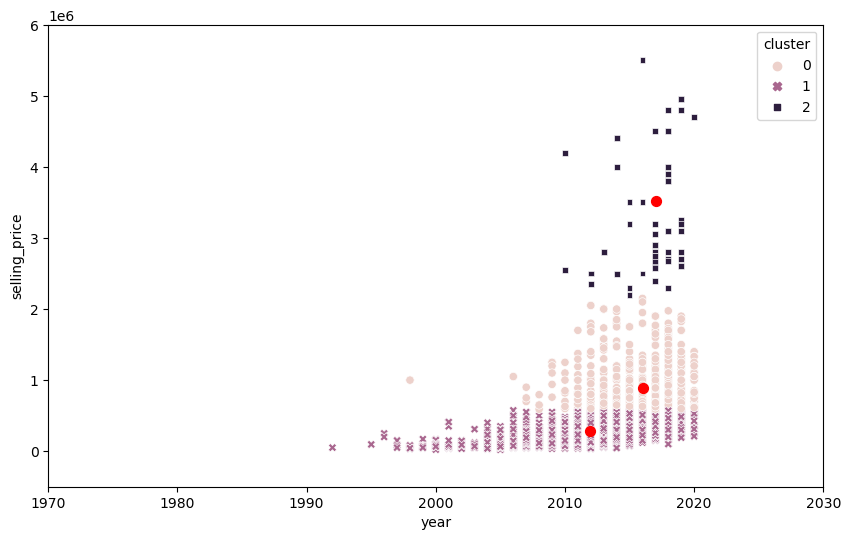

In [66]:
#Divide the year selling price grouping into clusters, 
year_price_df = cars_df[['year', 'selling_price']]
kmeans = KMeans(n_clusters = 3).fit(year_price_df)
#Cluster labels find which cluster each of the year selling_price combinations fall under
year_price_df['cluster'] = kmeans.labels_
year_price_df
#learn the cluster centers
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['year', 'selling_price'])
centers
year_price_df
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(x='year', y='selling_price', hue='cluster', style='cluster', ax=ax, data=year_price_df)
ax.set_xlim(1970, 2030)
ax.set_ylim(-500000, 6000000)
centers.plot.scatter(x='year', y='selling_price', ax=ax, s=50, color='red')

#### Lets do more KMeans analysis but with km_driven

c:\Users\scott\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\scott\AppData\Local\Temp\ipykernel_39060\234419144.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driven_price['cluster'] = kmeans.labels_


,selling_price,km_driven,cluster
0,60000,70000,0
1,135000,50000,0
2,600000,100000,2
3,250000,46000,0
4,450000,141000,2
...,...,...,...
4335,409999,80000,0
4336,409999,80000,0
4337,110000,83000,0
4338,865000,90000,2


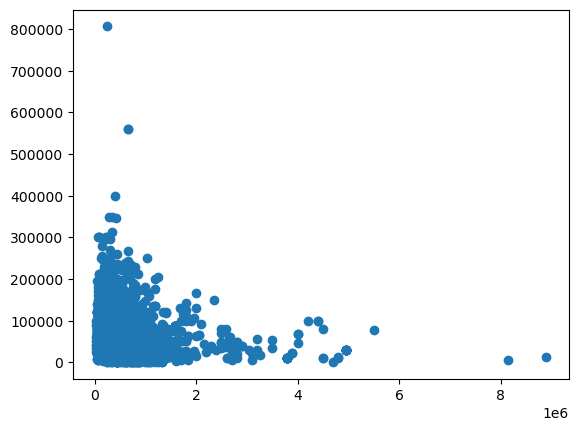

In [67]:
driven_price = cars_df[['selling_price', 'km_driven']]
#plt.scatter(driven_price['selling_price'], driven_price['km_driven'])
#based off the initial scatter plot I am seeing 3-5 clusters 
kmeans = KMeans(n_clusters = 5).fit(driven_price)
#Cluster labels find which cluster each of the km_driven selling_price combinations fall under
driven_price['cluster'] = kmeans.labels_
driven_price
centers = pd.DataFrame(kmeans.cluster_centers_)


In [28]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming 'df' is your dataframe
# We need to preprocess the data first, as k-means works with numerical data
# We'll use one-hot encoding for categorical variables and standard scaling for numerical variables

# Selecting numerical and categorical columns
numeric_features = ['year', 'selling_price', 'km_driven']
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

# Defining preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Pipeline for preprocessing and k-means clustering
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3))  # You can specify the number of clusters
])

# Fit the pipeline on your dataframe
pipeline.fit(cars_df)

# Add cluster labels to your original dataframe
cars_df['cluster_labels'] = pipeline['kmeans'].labels_

# Now you can analyze your data based on the clusters
# For example, you can check the characteristics of each cluster
cluster_centers = pipeline['kmeans'].cluster_centers_

# Print cluster centers (in the scaled space)
print("Cluster centers:")
print(cluster_centers)

# You can also analyze data based on these clusters, e.g., mean selling price, mean km driven, etc.
cluster_stats = cars_df.groupby('cluster_labels').mean()
print("Cluster statistics:")
print(cluster_stats)


c:\Users\scott\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers:
[[ 6.28371349e-01  1.15790119e-01 -5.22147760e-01  9.00514580e-03
   4.66552316e-01  2.71050543e-20  8.57632933e-04  5.23584906e-01
   3.35334477e-01  6.26072041e-01  3.85934820e-02  1.11063465e-01
   8.88936535e-01  8.83790738e-01  1.71526587e-03  9.60548885e-02
   7.28987993e-03  1.11492281e-02]
 [ 8.74048693e-01  4.76635518e+00 -5.73116724e-01  0.00000000e+00
   8.73873874e-01 -5.42101086e-20  8.67361738e-19  1.26126126e-01
   4.68468468e-01  4.23423423e-01  1.08108108e-01  1.00000000e+00
  -2.22044605e-16  9.09909910e-01 -3.46944695e-18  8.10810811e-02
   8.67361738e-19  9.00900901e-03]
 [-8.23606426e-01 -4.21237734e-01  6.75416201e-01  1.00158144e-02
   5.10279389e-01  5.27148129e-04  1.10701107e-02  4.68107538e-01
   8.43437006e-02  9.15656299e-01  1.38777878e-17  4.11175540e-02
   9.58882446e-01  3.53189246e-01  4.05904059e-02  4.60200316e-01
  -9.54097912e-18  1.46020032e-01]]
Cluster statistics:
                       year  selling_price     km_driven
cluster_

C:\Users\scott\AppData\Local\Temp\ipykernel_39060\1478607283.py:39: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats = cars_df.groupby('cluster_labels').mean()


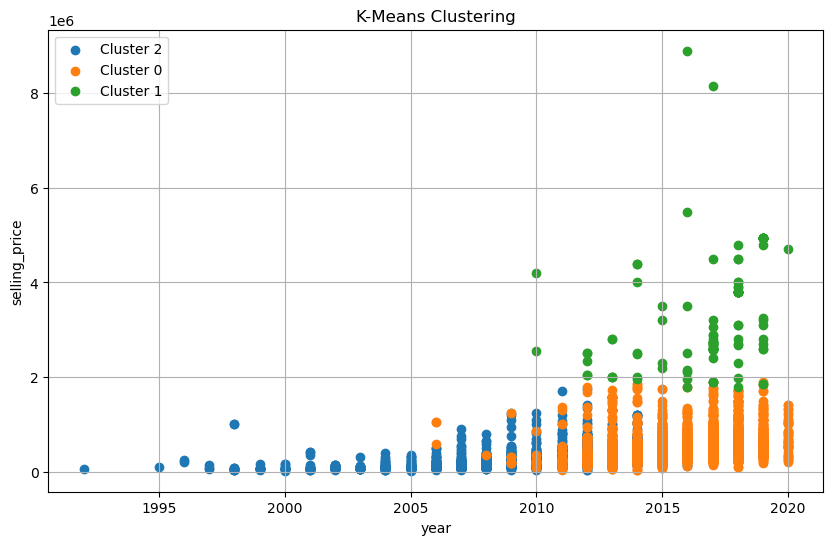

In [29]:
import matplotlib.pyplot as plt

# Assuming 'cars_df' is your dataframe
# Assuming 'cluster_labels' is the column containing cluster labels

# Selecting two features for visualization, for example, 'year' and 'selling_price'
feature1 = 'year'
feature2 = 'selling_price'

# Plotting the clusters
plt.figure(figsize=(10, 6))

for cluster_label in cars_df['cluster_labels'].unique():
    plt.scatter(cars_df[cars_df['cluster_labels'] == cluster_label][feature1],
                cars_df[cars_df['cluster_labels'] == cluster_label][feature2],
                label=f'Cluster {cluster_label}')

plt.title('K-Means Clustering')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("hello")